In [4]:
# Install and import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set random seed for reproducibility
np.random.seed(1337)

In [5]:
songs = pd.read_csv('Billboard.csv')

In [14]:
for col in songs.columns:
    print(col)


Song
Artist
Date
Weeks at Number One
Non-Consecutive
Rating 1
Rating 2
Rating 3
Overall Rating
Divisiveness
Label
Parent Label
CDR Genre
CDR Style
Discogs Genre
Discogs Style
Artist Structure
Featured Artists
Multiple Lead Vocalists
Group Named After Non-Lead Singer
Talent Contestant
Posthumous
Artist Place of Origin
Front Person Age
Artist Male
Artist White
Artist Black
Songwriters
Songwriters w/o Interpolation & Sample Credits
Songwriter Male
Songwriter White
Artist is a Songwriter
Artist is Only Songwriter
Producers
Producer Male
Producer White
Artist is a Producer
Artist is Only Producer
Songwriter is a Producer
Time Signature
Keys
Simplified Key
BPM
Energy
Danceability
Happiness
Loudness (dB)
Acousticness
Vocally Based
Bass Based
Guitar Based
Piano/Keyboard Based
Orchestral Strings
Horns/Winds
Accordion
Banjo
Bongos
Clarinet
Cowbell
Falsetto Vocal
Flute/Piccolo
Handclaps/Snaps
Harmonica
Human Whistling
Kazoo
Mandolin
Pedal/Lap Steel
Ocarina
Saxophone
Sitar
Trumpet
Ukulele
Violin
S

In [30]:
feature_cols = [
    'Weeks at Number One', 'BPM', 'Energy', 'Danceability', 'Happiness',
    'Acousticness', 'Loudness (dB)', 'Explicit'
]
target_col = 'Songwriter White'

# Drop rows with missing target or features so y_test has no NaN (accuracy_score fails on NaN)
songs_clean = songs.dropna(subset=feature_cols + [target_col])
X = songs_clean[feature_cols]
y = songs_clean[target_col]

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1337
)


In [31]:

print("\n🤖 Training the Classifier")
print("-" * 50)

# Create a Decision Tree Classifier (easy to understand)
classifier = DecisionTreeClassifier(
    max_depth=4,  # Limit depth to keep it simple
    random_state=1337
)

# Train the model
classifier.fit(X_train, y_train)

print("✅ Training complete!")
print(f"\nThe classifier learned from {len(X_train)} examples")


🤖 Training the Classifier
--------------------------------------------------
✅ Training complete!

The classifier learned from 821 examples



🌳 Visualizing How the Classifier Makes Decisions
--------------------------------------------------


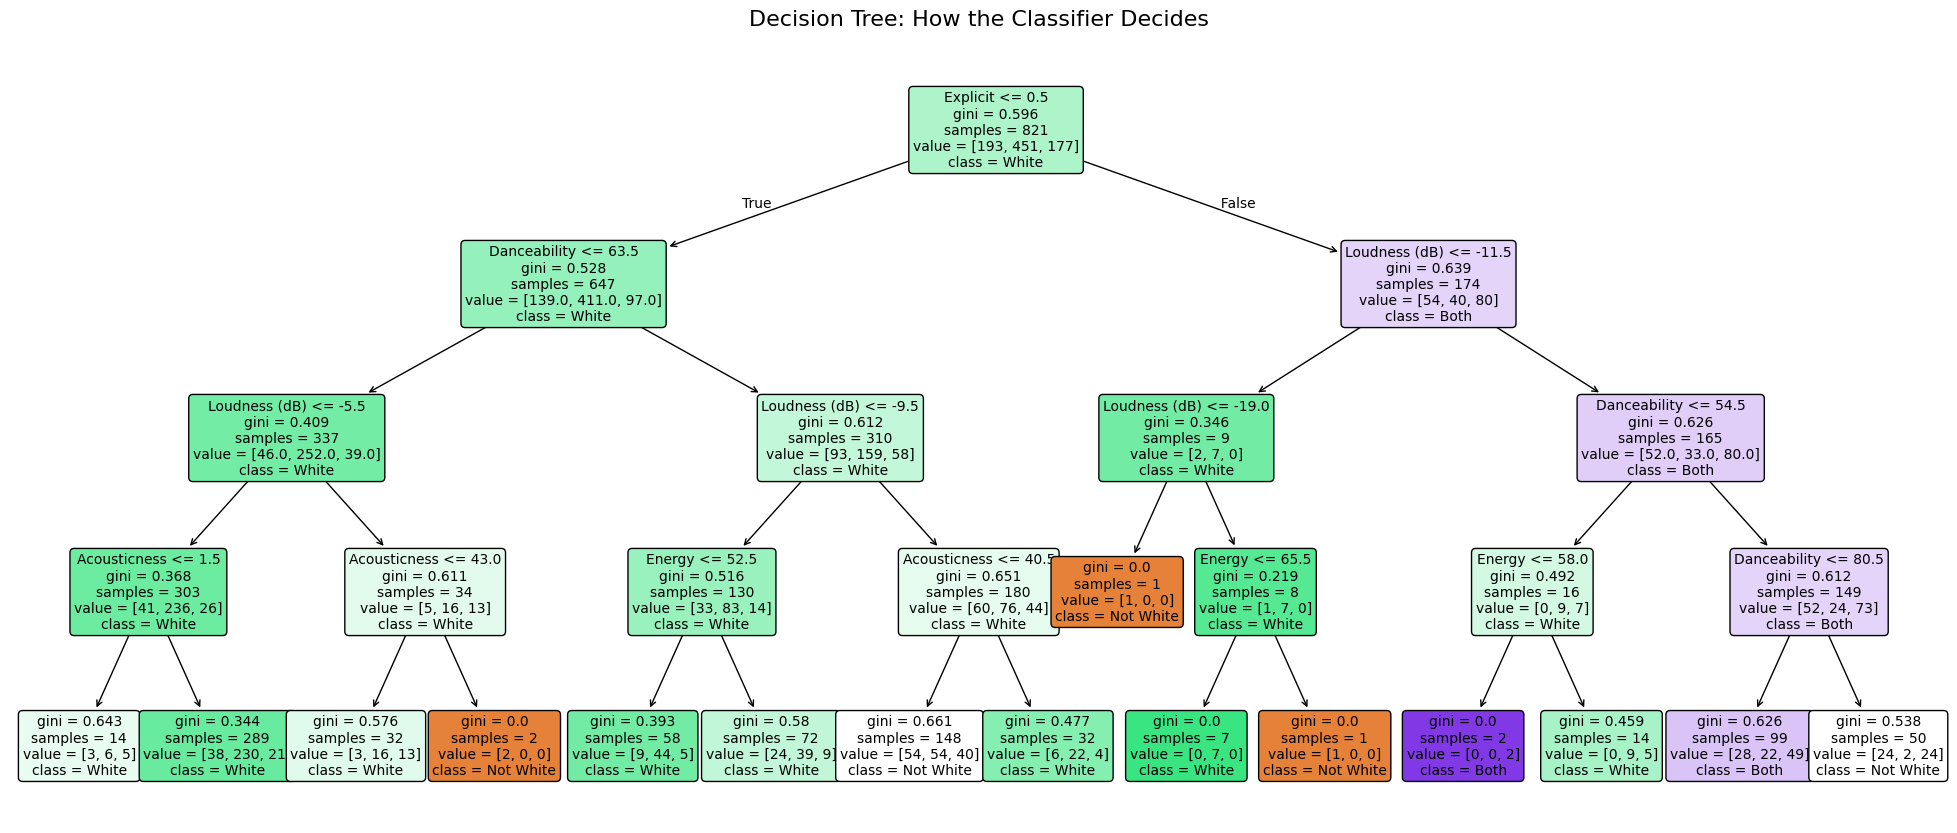

📖 How to read this tree:
   - Each box shows a decision rule
   - Follow the branches based on Yes/No answers
   - Color indicates the prediction (orange=Not Placed, blue=Placed)


In [32]:
# ============================================
# PART 6: Visualize the Decision Tree
# ============================================

print("\n🌳 Visualizing How the Classifier Makes Decisions")
print("-" * 50)

plt.figure(figsize=(25, 10))
plot_tree(classifier,
          feature_names=X.columns,
          class_names=['Not White', 'White', 'Both'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree: How the Classifier Decides", fontsize=16, pad=20)
plt.show()

print("📖 How to read this tree:")
print("   - Each box shows a decision rule")
print("   - Follow the branches based on Yes/No answers")
print("   - Color indicates the prediction (orange=Not Placed, blue=Placed)")


In [33]:
print("\n🔮 Making Predictions on New Data")
# Make predictions on test set
y_pred = classifier.predict(X_test)


🔮 Making Predictions on New Data


In [46]:
print("\n📊 Evaluating Classifier Performance")
print("=" * 50)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Overall Accuracy: {accuracy*100:.1f}%")
print(f"   The classifier correctly predicted {int(accuracy*len(y_test))} out of {len(y_test)} cases")

# Confusion Matrix
print("\n📋 Confusion Matrix:")
print("-" * 50)
cm = confusion_matrix(y_test, y_pred)
print(f"                  Predicted")
print(f"                  Not White  |  White    |  Both")
print(f"Actual  Not White    {cm[0,0]:3d}     |   {cm[0,1]:3d}     |   {cm[0,2]:3d}")
print(f"        White        {cm[1,0]:3d}     |   {cm[1,1]:3d}     |   {cm[1,2]:3d}")
print(f"        Both         {cm[2,0]:3d}     |   {cm[2,1]:3d}     |   {cm[2,2]:3d}")

print("\n📈 Detailed Metrics:")
print("-" * 50)
print(classification_report(y_test, y_pred,
                          target_names=['Not White', 'White', 'Both']))



📊 Evaluating Classifier Performance

🎯 Overall Accuracy: 59.4%
   The classifier correctly predicted 209 out of 352 cases

📋 Confusion Matrix:
--------------------------------------------------
                  Predicted
                  Not White  |  White    |  Both
Actual  Not White     27     |    46     |     9
        White         37     |   162     |     8
        Both          23     |    20     |    20

📈 Detailed Metrics:
--------------------------------------------------
              precision    recall  f1-score   support

   Not White       0.31      0.33      0.32        82
       White       0.71      0.78      0.74       207
        Both       0.54      0.32      0.40        63

    accuracy                           0.59       352
   macro avg       0.52      0.48      0.49       352
weighted avg       0.59      0.59      0.58       352




🌲 Training a Random Forest Classifier
What is Random Forest?
   - Creates MANY decision trees (a 'forest')
   - Each tree votes on the prediction
   - Final prediction = majority vote
   - Usually more accurate and stable than a single tree

🎯 Random Forest Accuracy: 64.5%

📋 Random Forest Confusion Matrix:
                  Predicted
                  Not White  |  White    |  Both
Actual  Not White      2     |    64     |    16
        White          1     |   198     |     8
        Both           1     |    35     |    27

📊 Feature Importance (which features matter most?):
--------------------------------------------------


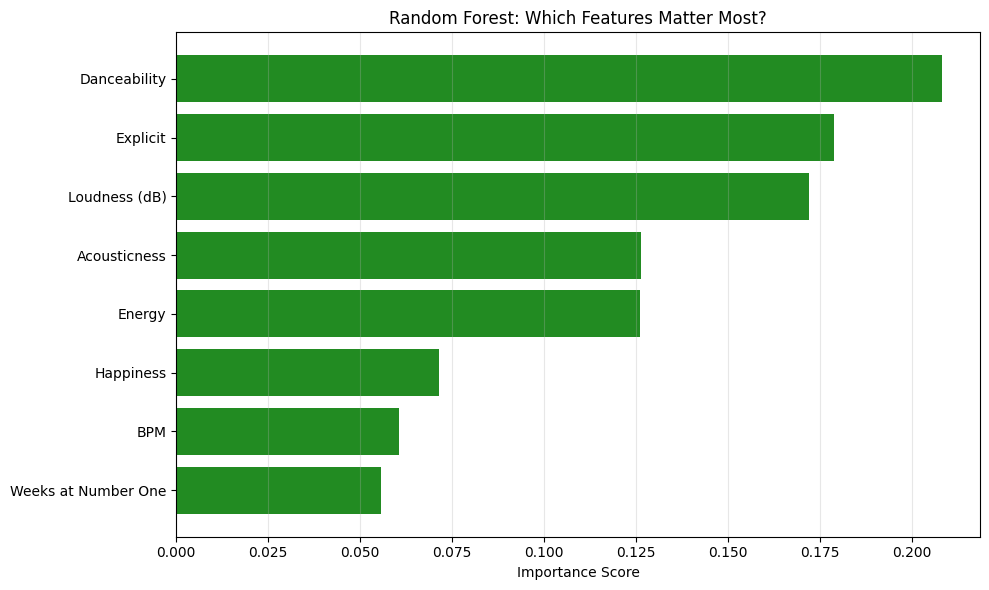

            Feature  Importance
       Danceability    0.208209
           Explicit    0.178946
      Loudness (dB)    0.172063
       Acousticness    0.126445
             Energy    0.126211
          Happiness    0.071625
                BPM    0.060652
Weeks at Number One    0.055850

💡 Higher importance = feature has more influence on predictions


In [42]:
from sklearn.ensemble import RandomForestClassifier

print("\n🌲 Training a Random Forest Classifier")
print("=" * 50)
print("What is Random Forest?")
print("   - Creates MANY decision trees (a 'forest')")
print("   - Each tree votes on the prediction")
print("   - Final prediction = majority vote")
print("   - Usually more accurate and stable than a single tree\n")

# Create and train Random Forest
rf_classifier = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=4,
    random_state=42
)

rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

# Evaluate
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"🎯 Random Forest Accuracy: {rf_accuracy*100:.1f}%")

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_pred)
print(f"\n📋 Random Forest Confusion Matrix:")
print(f"                  Predicted")
print(f"                  Not White  |  White    |  Both")
print(f"Actual  Not White    {rf_cm[0,0]:3d}     |   {rf_cm[0,1]:3d}     |   {rf_cm[0,2]:3d}")
print(f"        White        {rf_cm[1,0]:3d}     |   {rf_cm[1,1]:3d}     |   {rf_cm[1,2]:3d}")
print(f"        Both         {rf_cm[2,0]:3d}     |   {rf_cm[2,1]:3d}     |   {rf_cm[2,2]:3d}")

# Feature Importance
print("\n📊 Feature Importance (which features matter most?):")
print("-" * 50)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_classifier.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='forestgreen')
plt.xlabel('Importance Score')
plt.title('Random Forest: Which Features Matter Most?')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print(feature_importance.to_string(index=False))
print("\n💡 Higher importance = feature has more influence on predictions")

In [44]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

print("\n⚡ Training a Support Vector Machine (SVM)")
print("=" * 50)
print("What is SVM?")
print("   - Finds the best 'boundary' to separate classes")
print("   - Tries to maximize the distance between groups")
print("   - Works well with numerical features")
print("   - Needs features to be on similar scales\n")

# SVMs work better with scaled features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train SVM
svm_classifier = SVC(
    kernel='rbf',  # Radial Basis Function - works well for complex patterns
    random_state=42
)

svm_classifier.fit(X_train_scaled, y_train)
svm_pred = svm_classifier.predict(X_test_scaled)

# Evaluate
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"🎯 SVM Accuracy: {svm_accuracy*100:.1f}%")

# Confusion Matrix
svm_cm = confusion_matrix(y_test, svm_pred)
print(f"\n📋 SVM Confusion Matrix:")
print(f"                  Predicted")
print(f"                  Not White  |  White    |  Both")
print(f"Actual  Not White    {svm_cm[0,0]:3d}     |   {svm_cm[0,1]:3d}     |   {svm_cm[0,2]:3d}")
print(f"        White        {svm_cm[1,0]:3d}     |   {svm_cm[1,1]:3d}     |   {svm_cm[1,2]:3d}")
print(f"        Both         {svm_cm[2,0]:3d}     |   {svm_cm[2,1]:3d}     |   {svm_cm[2,2]:3d}")

print("\n📝 Detailed SVM Report:")
print("-" * 50)
print(classification_report(y_test, svm_pred,
                          target_names=['Not White', 'White', 'Both']))


⚡ Training a Support Vector Machine (SVM)
What is SVM?
   - Finds the best 'boundary' to separate classes
   - Tries to maximize the distance between groups
   - Works well with numerical features
   - Needs features to be on similar scales

🎯 SVM Accuracy: 65.9%

📋 SVM Confusion Matrix:
                  Predicted
                  Not White  |  White    |  Both
Actual  Not White      5     |    65     |    12
        White          1     |   201     |     5
        Both           2     |    35     |    26

📝 Detailed SVM Report:
--------------------------------------------------
              precision    recall  f1-score   support

   Not White       0.62      0.06      0.11        82
       White       0.67      0.97      0.79       207
        Both       0.60      0.41      0.49        63

    accuracy                           0.66       352
   macro avg       0.63      0.48      0.46       352
weighted avg       0.65      0.66      0.58       352




🏆 Comparing All Classifiers

📊 Performance Summary:
        Model  Accuracy  True Positives  False Positives  True Negatives  False Negatives
Decision Tree  0.593750             162               46              27               37
Random Forest  0.644886             198               64               2                1
          SVM  0.659091             201               65               5                1


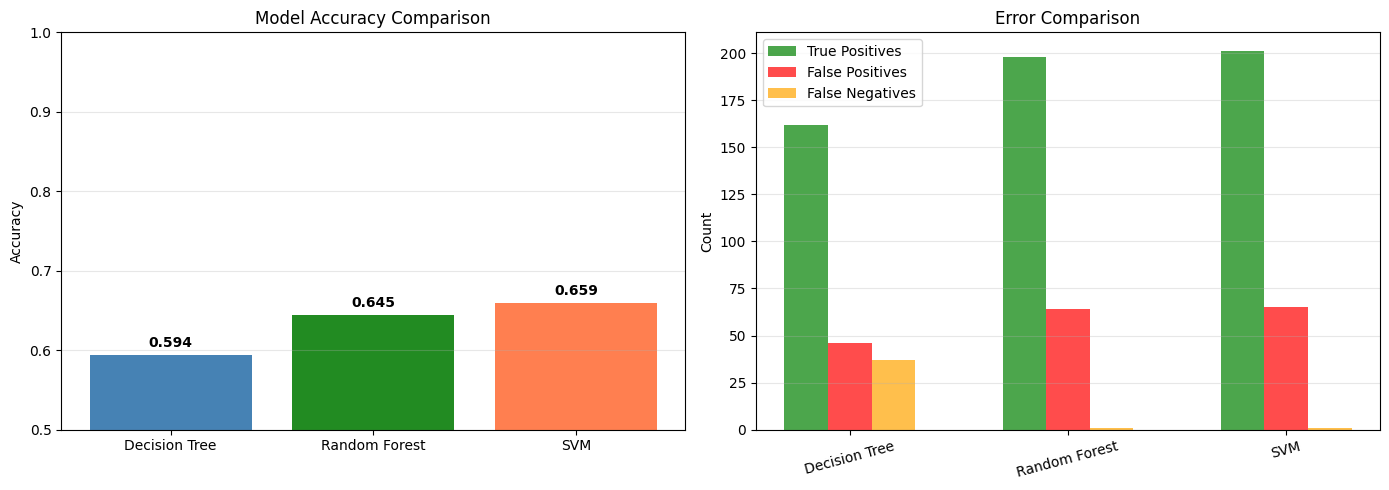

In [47]:
print("\n🏆 Comparing All Classifiers")
print("=" * 50)

# Collect all predictions and metrics
models_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'SVM'],
    'Accuracy': [accuracy, rf_accuracy, svm_accuracy],
    'True Positives': [cm[1,1], rf_cm[1,1], svm_cm[1,1]],
    'False Positives': [cm[0,1], rf_cm[0,1], svm_cm[0,1]],
    'True Negatives': [cm[0,0], rf_cm[0,0], svm_cm[0,0]],
    'False Negatives': [cm[1,0], rf_cm[1,0], svm_cm[1,0]]
})

print("\n📊 Performance Summary:")
print(models_comparison.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy comparison
axes[0].bar(models_comparison['Model'], models_comparison['Accuracy'],
            color=['steelblue', 'forestgreen', 'coral'])
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Model Accuracy Comparison')
axes[0].set_ylim([0.5, 1.0])
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(models_comparison['Accuracy']):
    axes[0].text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

# Confusion matrices side by side
x = np.arange(3)
width = 0.2

axes[1].bar(x - width, models_comparison['True Positives'], width,
            label='True Positives', color='green', alpha=0.7)
axes[1].bar(x, models_comparison['False Positives'], width,
            label='False Positives', color='red', alpha=0.7)
axes[1].bar(x + width, models_comparison['False Negatives'], width,
            label='False Negatives', color='orange', alpha=0.7)

axes[1].set_ylabel('Count')
axes[1].set_title('Error Comparison')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models_comparison['Model'], rotation=15)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()
